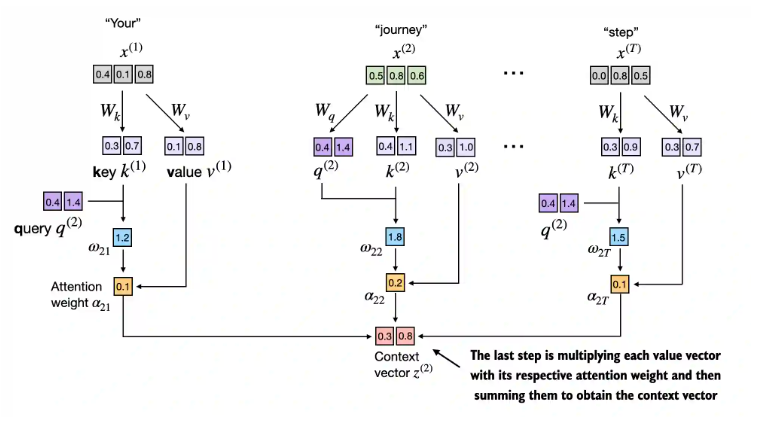

In [2]:
import torch
from torch import nn


Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


c:\Users\Hyder\Desktop\Building_LLM\.venv\Lib\site-packages\torch\_subclasses\functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [3]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [4]:
inputs.shape

torch.Size([6, 3])

In [5]:
input_query=inputs[1]
input_query


tensor([0.5500, 0.8700, 0.6600])

In [6]:
atten_score=torch.empty(inputs.shape[0])
atten_score

tensor([0., 0., 0., 0., 0., 0.])

In [7]:
for i,t in enumerate(inputs):
    print(t, input_query)
    print(torch.dot(t,input_query))
    atten_score[i]=torch.dot(t,input_query)
    


tensor([0.4300, 0.1500, 0.8900]) tensor([0.5500, 0.8700, 0.6600])
tensor(0.9544)
tensor([0.5500, 0.8700, 0.6600]) tensor([0.5500, 0.8700, 0.6600])
tensor(1.4950)
tensor([0.5700, 0.8500, 0.6400]) tensor([0.5500, 0.8700, 0.6600])
tensor(1.4754)
tensor([0.2200, 0.5800, 0.3300]) tensor([0.5500, 0.8700, 0.6600])
tensor(0.8434)
tensor([0.7700, 0.2500, 0.1000]) tensor([0.5500, 0.8700, 0.6600])
tensor(0.7070)
tensor([0.0500, 0.8000, 0.5500]) tensor([0.5500, 0.8700, 0.6600])
tensor(1.0865)


In [8]:
atten_score

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

In [9]:
atten_score_n=atten_score/atten_score.sum()
atten_score_n

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])

In [10]:
atten_score_n2=torch.softmax(atten_score,dim=0)
atten_score_n2

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [11]:
## attention Weight
print(atten_score_n2, inputs)
atten_weights=atten_score_n2@inputs
print(atten_weights)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581]) tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
tensor([0.4419, 0.6515, 0.5683])


In [12]:
print(inputs.shape)
print(inputs.T.shape)

torch.Size([6, 3])
torch.Size([3, 6])


In [13]:
atten_score_overall=inputs@inputs.T

In [14]:
atten_score_overall

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [15]:
attention_score_sft=torch.softmax(atten_score_overall,dim=1)

In [16]:
attention_score_sft

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [17]:
atten_weights_overall=attention_score_sft@inputs

In [18]:
atten_weights

tensor([0.4419, 0.6515, 0.5683])

In [19]:
atten_weights_overall

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

### Implementing Self_Attention Class with Trainable weights

In [20]:
class self_attn_v1(nn.Module):
    def __init__(self,d_in,d_out):
        super().__init__()
        self.W_q=nn.Linear(d_in,d_out)
        self.W_k=nn.Linear(d_in,d_out)
        self.W_v=nn.Linear(d_in,d_out)

    def forward(self,x):
        query=self.W_q(x)
        key=self.W_v(x)
        value=self.W_v(x)

        atten_score=query@key.T
        atten_weights=torch.softmax(atten_score/key.shape[-1]**0.5,dim=-1)
        context_emd=atten_weights@value

        return context_emd
torch.manual_seed(123)
d_in = inputs.shape[1] # the input embedding size, d=3
d_out = 2 # the output embedding size, d=2
sa_v1=self_attn_v1(d_in,d_out)
sa_v1(inputs)







tensor([[0.1004, 0.9257],
        [0.0980, 0.9219],
        [0.0980, 0.9220],
        [0.1008, 0.9226],
        [0.1009, 0.9238],
        [0.1000, 0.9219]], grad_fn=<MmBackward0>)

In [21]:
mask=torch.tril(torch.ones(inputs.shape[0],inputs.shape[0]))
mask.masked_fill(mask==0,float('-inf'))

tensor([[1., -inf, -inf, -inf, -inf, -inf],
        [1., 1., -inf, -inf, -inf, -inf],
        [1., 1., 1., -inf, -inf, -inf],
        [1., 1., 1., 1., -inf, -inf],
        [1., 1., 1., 1., 1., -inf],
        [1., 1., 1., 1., 1., 1.]])

In [22]:
class causal_attn_v1(nn.Module):
    def __init__(self,d_in,d_out,context_length):
        super().__init__()
        self.W_q=nn.Linear(d_in,d_out)
        self.W_k=nn.Linear(d_in,d_out)
        self.W_v=nn.Linear(d_in,d_out)
        self.context_length=context_length

    def forward(self,x):
        query=self.W_q(x)
        key=self.W_k(x)
        value=self.W_v(x)

        atten_score=query @ key.transpose(0, 1)
        print(atten_score)
        mask=torch.tril(torch.ones(self.context_length,self.context_length))
        mask=mask.masked_fill(mask==0,float('-inf'))
        mask=mask.masked_fill(mask==1,float(0.0))

        print(mask)
        atten_score=atten_score + mask
        print(atten_score)
        atten_weights=torch.softmax( atten_score / key.shape[-1]**0.5, dim=-1 )
        print(atten_weights)
        context_emd=atten_weights@value

        return context_emd
torch.manual_seed(123)
d_in = inputs.shape[1] # the input embedding size, d=3
d_out = 2 # the output embedding size, d=2
sa_v1=causal_attn_v1(d_in,d_out,context_length=6)
sa_v1(inputs)







tensor([[0.4271, 0.2928, 0.2979, 0.1923, 0.3536, 0.1500],
        [0.5730, 0.5534, 0.5491, 0.3795, 0.3750, 0.4352],
        [0.5703, 0.5495, 0.5453, 0.3767, 0.3741, 0.4312],
        [0.5143, 0.5440, 0.5368, 0.3764, 0.3074, 0.4595],
        [0.4756, 0.4463, 0.4436, 0.3051, 0.3194, 0.3422],
        [0.5452, 0.5841, 0.5760, 0.4047, 0.3213, 0.4979]],
       grad_fn=<MmBackward0>)
tensor([[0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0.]])
tensor([[0.4271,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.5730, 0.5534,   -inf,   -inf,   -inf,   -inf],
        [0.5703, 0.5495, 0.5453,   -inf,   -inf,   -inf],
        [0.5143, 0.5440, 0.5368, 0.3764,   -inf,   -inf],
        [0.4756, 0.4463, 0.4436, 0.3051, 0.3194,   -inf],
        [0.5452, 0.5841, 0.5760, 0.4047, 0.3213, 0.4979]],
       grad_fn=<AddBackward0>)
tensor

tensor([[-0.0960,  0.7940],
        [ 0.0285,  0.9387],
        [ 0.0657,  0.9850],
        [ 0.1062,  0.9604],
        [ 0.0659,  0.9308],
        [ 0.1188,  0.9375]], grad_fn=<MmBackward0>)

## Multihead Attention

In [36]:
class MultiHead_attn_v1(nn.Module):
    def __init__(self,d_in,d_out,context_length,dropout,num_heads,Masking=True,qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"
        self.d_out = d_out

        self.W_q=nn.Linear(d_in,d_out,bias=qkv_bias) 
        self.W_k=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_v=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.context_length=context_length
        self.num_heads=num_heads
        self.dropout = nn.Dropout(dropout)

        self.head_dim=d_out//self.num_heads
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.Masking=Masking
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self,x):
        b, seq_length, d_in = x.shape

        query=self.W_q(x) #shape(b,seq_length,d_out)
        key=self.W_k(x)
        value=self.W_v(x)


        query=query.view(b,seq_length,self.num_heads,self.head_dim)
        key=key.view(b,seq_length,self.num_heads,self.head_dim)
        value=value.view(b,seq_length,self.num_heads,self.head_dim)


        query=query.transpose(1,2)
        key=key.transpose(1,2)
        value=value.transpose(1,2)  #(b,num_head,seq_length,head_dim)


        atten_score=query @ key.transpose(2,3)
        # print(atten_score)
        if self.Masking:
            mask = torch.tril(torch.ones(seq_length, seq_length, device=x.device))
            mask = mask.unsqueeze(0).unsqueeze(0)  # (1,1,seq,seq)
            atten_score = atten_score.masked_fill(mask == 0, float('-inf'))

            # print(mask)
            atten_score=atten_score + mask
        # print(atten_score)
        atten_weights=torch.softmax( atten_score / key.shape[-1]**0.5, dim=-1 )
        atten_weights = self.dropout(atten_weights)

        # print(atten_weights)
        context_emd=atten_weights@value
        context_emd=context_emd.transpose(2,1) #(b,seq_length,self.num_heads,self.head_dim)
        context_emd=context_emd.contiguous().view(b,seq_length,self.d_out)
        context_emd = self.out_proj(context_emd) # optional projection


    
        return context_emd
    
batch = torch.stack((inputs, inputs), dim=0)

batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHead_attn_v1(d_in, d_out, context_length, num_heads=2,dropout=0.0)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.0428, 0.6631],
         [0.1836, 0.6218],
         [0.2323, 0.6075],
         [0.2375, 0.5936],
         [0.2469, 0.5956],
         [0.2464, 0.5867]],

        [[0.0428, 0.6631],
         [0.1836, 0.6218],
         [0.2323, 0.6075],
         [0.2375, 0.5936],
         [0.2469, 0.5956],
         [0.2464, 0.5867]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])
